In [1]:
import os
import pickle
from lared_dataset.data_loading.utils import (
    Maker,
    reset_examples_ids,
    write_all_example_videos)

from lared_dataset.constants import (
    processed_pose_path, 
    processed_videos_path,
    processed_accel_path,
    vad_path,
    examples_path)
from lared_dataset.preprocess.pose.plotting import PosePlotter
from lared_dataset.data_loading.utils import get_track_rectangle, tlwh_to_tlbr, enlarge_rectangle

In [2]:
def make_all_examples():
    examples = []
    for cam in [2,3]:
        tracks_path = os.path.join(processed_pose_path, 'tracks', f'cam{cam}_final.pkl')

        accel_path = os.path.join(processed_accel_path, 'subj_accel_interp.pkl')
        maker = Maker(tracks_path, accel_path, vad_path)
        examples += maker.make_examples(cam=cam)
    
    return examples

In [3]:
def write_examples(examples):
    out_path = os.path.join(processed_videos_path, 'examples')
    reset_examples_ids(examples)
    write_all_example_videos(examples, out_path)

In [4]:
examples = make_all_examples()

In [5]:
len(examples)

16403

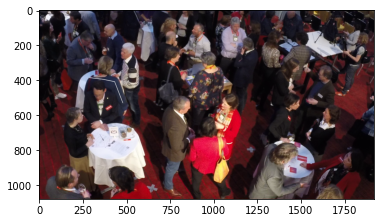

In [6]:
plotter = PosePlotter()
plotter.plot_first_frame(examples[200])

In [22]:
write_examples(examples)

  0%|          | 86/23039 [00:05<26:02, 14.69it/s]

In [7]:
pickle.dump(examples, open(examples_path, 'wb'))